In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [ ]:
df = pd.read_csv("Mult_Reg_Yield.csv")

In [ ]:
df.head()

,Time,Temperature,Yield
0,130,190,35.0
1,174,176,81.7
2,134,205,42.5
3,191,210,98.3
4,165,230,52.7


In [ ]:
df.describe()

,Time,Temperature,Yield
count,16.000000,16.000000,16.000000
mean,163.937500,213.062500,66.981250
std,23.450569,17.650189,23.705336
min,130.000000,176.000000,34.500000
25%,142.000000,203.750000,44.100000
50%,169.500000,214.000000,69.200000
75%,186.500000,226.250000,86.150000
max,194.000000,240.000000,98.300000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         16 non-null     int64  
 1   Temperature  16 non-null     int64  
 2   Yield        16 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 512.0 bytes


In [ ]:
df.isna().sum()

Time           0
Temperature    0
Yield          0
dtype: int64

In [ ]:
# df.fillna()

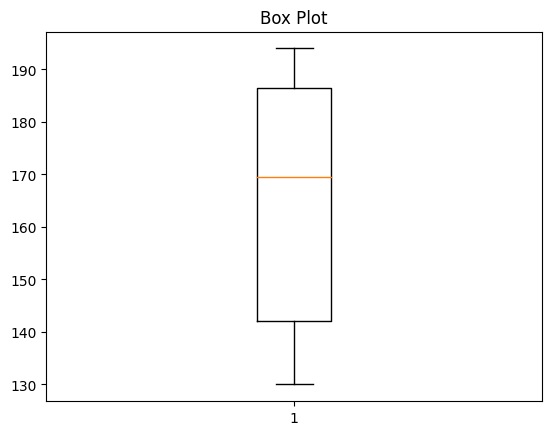

In [ ]:
plt.boxplot(df["Time"])
plt.title("Box Plot")
plt.show()

In [ ]:
X = df.iloc[:,0:2]
X

,Time,Temperature
0,130,190
1,174,176
2,134,205
3,191,210
4,165,230
5,194,192
6,143,220
7,186,235
8,139,240
9,188,230


In [ ]:
y = df.Yield
y

0     35.0
1     81.7
2     42.5
3     98.3
4     52.7
5     82.0
6     34.5
7     95.4
8     56.7
9     84.4
10    94.3
11    44.3
12    83.3
13    91.4
14    43.5
15    51.7
Name: Yield, dtype: float64

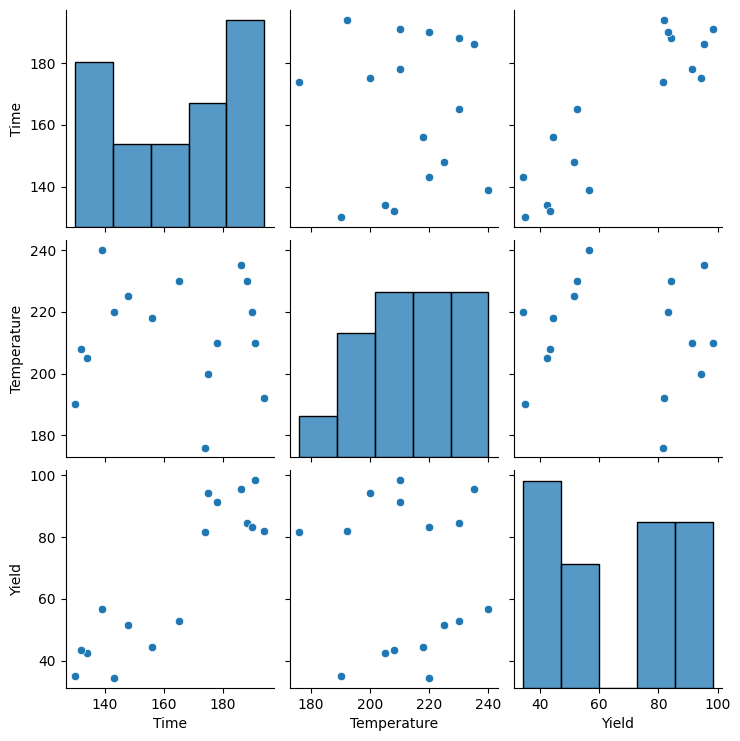

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
lr = LinearRegression()

In [ ]:
model = lr.fit(X,y)

Linear Regression
Yield = B0 + (B1 x Time) + (B2 x Temperature)

In [ ]:
model.coef_ 
#to find coefficients from the model
#these are the B1 and B2 values

array([ 0.90608862, -0.06418911])

In [ ]:
model.intercept_
#this is the B0 value, intercept

-67.8843597036845

In [ ]:
#model here is
# yield = -67.8843597036845 + (0.90608862 x Time) + (-0.06418911 x Temperature)

In [ ]:
#performance measures
rsq = model.score(X,y)
rsq

0.8063763881995268

In [ ]:
pred = model.predict(X)

In [ ]:
mse = mean_squared_error(y,pred)
mse

102.00508614219636

In [ ]:
import math
rmse = math.sqrt(mse)
rmse

10.099756736783137

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
score = cross_val_score(model, X, y, scoring='neg_mean_squared_error',cv = 4)
score

array([ -32.01088274, -210.53848586, -187.22995242,  -60.51099775])

if R^2 value is greater than normal R^2 value use the model predicted with cross validation to obtain the result

use correct multiple, here cv=4 as here 16 data points 

In [ ]:
#Error analysis
'''model.summary()'''

'model.summary()'

In [ ]:
'''import statsmodels.api as sm '''

In [ ]:
'''
model = sm.OLS(y,X)
fitted_model = model.fit()
fitted_model.summary()
'''

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Yield   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              276.1
Date:                Wed, 26 Apr 2023   Prob (F-statistic):                    5.65e-12
Time:                        08:48:40   Log-Likelihood:                         -61.262
No. Observations:                  16   AIC:                                      126.5
Df Residuals:                      14   BIC:                                      128.1
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Time            0.8019      0.113      7.089      0.000       0.559       1.045
Temperature    -0.3011      0.088     -3.438      0.004      -0.489      -0.113
==============================================================================
Omnibus:                        2.452   Durbin-Watson:                   1.631
Prob(Omnibus):                  0.293   Jarque-Bera (JB):                1.120
Skew:                           0.193   Prob(JB):                        0.571
Kurtosis:                       1.762   Cond. No.                         12.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Residual Analysis
# 1.pp plot - if all points lie in x=y then the model is good and follows approximation of normal distribution

### Logistic Regression

Predict non - payment of draft by customers

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
df1 = pd.read_csv("Logistic_Reg.csv")

In [ ]:
df2 = pd.read_csv("bank-data.csv")

In [ ]:
df1.describe()

,Ind_Exp_Act_Score,Tran_Speed_Score,Peer_Comb_Score,Outcome
count,980.000000,980.00000,980.000000,980.000000
mean,5.042857,5.03602,4.940000,0.723469
std,2.865087,2.92462,2.893484,0.447511
min,0.000000,0.00000,0.000000,0.000000
25%,2.600000,2.40000,2.500000,0.000000
50%,5.100000,5.10000,4.900000,1.000000
75%,7.500000,7.50000,7.400000,1.000000
max,10.000000,10.00000,10.000000,1.000000


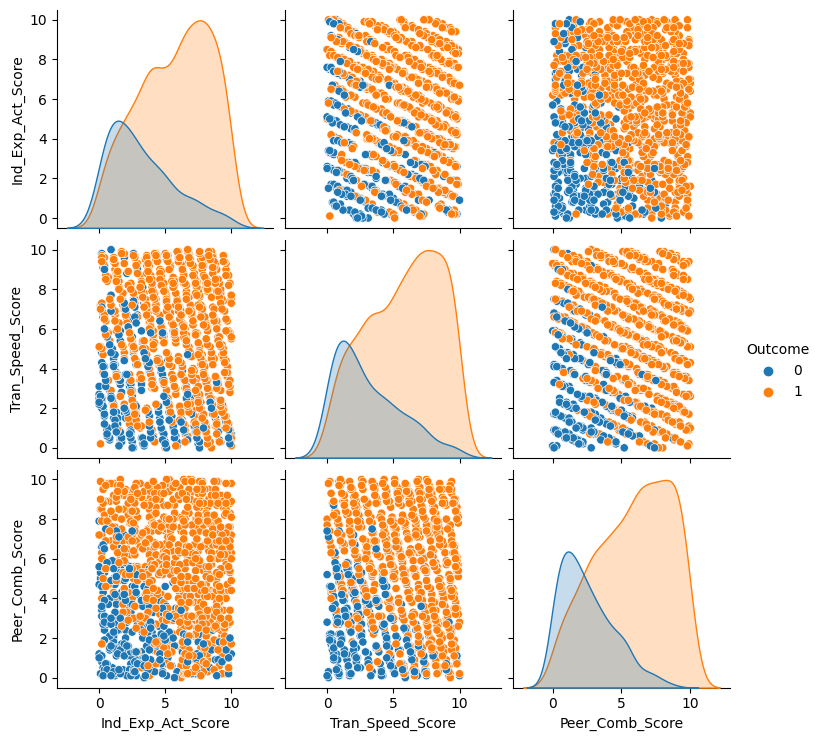

In [ ]:
sns.pairplot(df1, hue='Outcome')
plt.show()

In [ ]:
X = df1.iloc[:,0:3]
y = df1.Outcome

In [ ]:
model = LogisticRegression(C = 1e08) # 1e08 = 10^8
model.fit(X,y)

LogisticRegression(C=100000000.0)

In [ ]:
model.intercept_

array([-35.50615344])

In [ ]:
model.coef_

array([[2.7957264 , 2.75315703, 3.51531432]])

In [ ]:
#model is:
'''
 outcome  = 1 / 1+e**(-z)
  z = -35.50615344 + (2.7957264*Ind_Exp_Act_Score) + (2.75315703*Tran_Speed_Score)	+ (3.51531432*Peer_Comb_Score)
'''

'\n outcome  = 1 / 1+e**(-z)\n  z = -35.50615344 + (2.7957264*Ind_Exp_Act_Score) + (2.75315703*Tran_Speed_Score)\t+ (3.51531432*Peer_Comb_Score)\n'

In [ ]:
accuracy = model.score(X,y)
accuracy

0.9714285714285714

In [ ]:
pred = model.predict(X)

In [ ]:
pred_prob = model.predict_proba(X)
pred_prob

array([[2.88657986e-15, 1.00000000e+00],
       [2.24162471e-04, 9.99775838e-01],
       [3.74296150e-11, 1.00000000e+00],
       ...,
       [9.99596344e-01, 4.03655902e-04],
       [9.99901849e-01, 9.81512294e-05],
       [9.24387621e-01, 7.56123794e-02]])

In [ ]:
predclass = model.predict(X)
# predclass

In [ ]:
pd.crosstab(y, predclass)

col_0,0,1
Outcome,,
0,257,14
1,14,695


In [ ]:
confusion_matrix(y,predclass)

array([[257,  14],
       [ 14, 695]])

In [ ]:
report = classification_report(y, predclass)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       271
           1       0.98      0.98      0.98       709

    accuracy                           0.97       980
   macro avg       0.96      0.96      0.96       980
weighted avg       0.97      0.97      0.97       980



### Naive Bayes

bayes theorem  P(y/x1..xn) = 

Naive Bayes classifier  
- bernoulli - only 2 classes
- Gaussian NB - data is normally distributed
- multinomial - from discrete counts

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
X_train = pd.read_csv("Iris_data.csv")
X_test = pd.read_csv("Iris_test.csv")

In [ ]:
X_train.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [ ]:
X_train.describe()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,75.316832,5.749505,3.061386,3.654455,1.167327,0.970297
std,44.188897,0.795566,0.451878,1.741294,0.748346,0.805673
min,1.000000,4.400000,2.000000,1.000000,0.100000,0.000000
25%,39.000000,5.100000,2.800000,1.500000,0.300000,0.000000
50%,75.000000,5.700000,3.000000,4.200000,1.300000,1.000000
75%,116.000000,6.300000,3.400000,5.000000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
X = X_train.iloc[:,0:5]
y = X_train.Species

In [ ]:
# model = GaussianNB(X,y)
# model = model.fit(X,y)

In [ ]:
from sklearn.model_selection import train_test_split

gridSearchCV